#  Malaria Cell Images Detected

#### Integrantes: Luís Loureiro, Luca Machado, Thiago Pegorer, Thomas Bekhor

### Motivação

   A malária é uma doença infecciosa provocada por um protozoário parasitário, tendo infectado 219 milhôes de pessoas e provocado 435.000 mortes em 2017 (ONU:WHO-2017). Descoberto em 1880 por um militar francês, Alphonse Leveran, ela ainda se mostra endêmica em regiôes subtropicais, especialmente em países subdesenvolvidos. No continente africano a malária é especialmente preocupante; apresenta 70% dos casos, apesar dos esforços da World Health Organization (WHO) que contou com um orçamento em 2017 de 3.1 bilhões de dólares.
   
   Destarte, maneiras menos custosas que possam ser aplicadas em larga escala serviriam de grande valia para o combate de uma doença que ainda apresenta números alarmantes no século XXI. É nesse sentido que o presente trabalho se dispõe, criou-se um programa por meio de Machine Learning que identifica se o exame aponta ou não o parasita com uma taxa de acerto de **96,17%**. 

In [ ]:
display(Image(filename='imagem_1_malaria.jpg'))

## Procedimento para criação do Identificador (Machine Learning)

A partir da base de dados ("Referências" II) que oferece 13 mil exames infectados e outros 13 mil sem a doença foi trabalhado com a distribuição das cores RGB em cada uma imagem. Dessa maneira, foi criado um array para cada cor que, depois de ser concatenado, forma um vetor único correspondente a cada exame. Tendo posse do mesmo, foi possível relacioná-lo de maneira binária com a correspondência de haver (1) ou não (0) a doença. Por meio do algoritmo RandomForest ("Sobre o algoritmo") identificou-se um padrão que foi colocado em prova; obtendo-se como resposta 96,17%.

## Sobre o algoritmo

O algoritmo RandomForest (importado da biblioteca 'sklearn' do Python) é um 'Ensembled algorithms', isto é, faz uso de um conjunto de outros algoritmos entre eles o Naive Bayes e Decisão por Árvore, para identificar um padrão. Para isso, é utilizado a base de dados teste (Xtrain e Ytrain) para 'treinar' o identificador. Após essa marcação é aplicado o mesmo padrão para uma nova base de dados (Xtest, Ytest) e testado, apresentado, ao final, uma taxa de acuracy que corresponde a porcentagem de acerto obtido a partir desse padrão estabelecido.

#### Importando as bibliotecas 

In [3]:
import cv2
import matplotlib.pyplot as plt 
import seaborn as sns
import os
from PIL import Image
import numpy as np
import pandas as pd
from IPython.display import display, Image


#### Abrindo os arquivos 

In [4]:
parasitized_data = os.listdir('cell-images-for-detecting-malaria/cell_images/cell_images/Parasitized/')
uninfected_data = os.listdir('cell-images-for-detecting-malaria/cell_images/cell_images/Uninfected/')

## Sobre a base de dados (exames)

Abaixo apresenta 8 (oito) exemplos dos exames que serviram como base de dados para essa projeto, sendo quatro que indicam a existência do parasita (1) e outros quatro não infectado (0). Visualmente um padrão é perceptível; naqueles infectados observa-se a formação de um núcleo roxeado com posição indefinida.

#### Infectados:

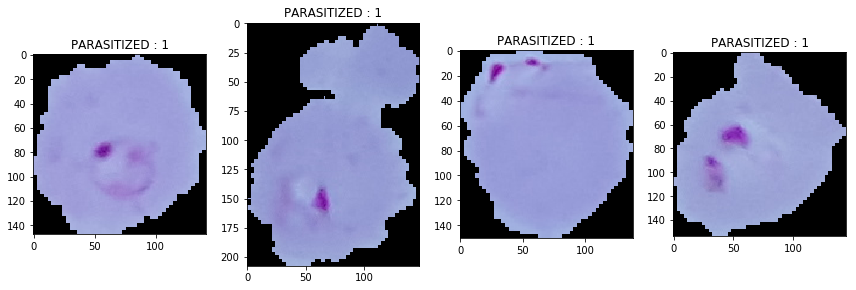

In [5]:
plt.figure(figsize = (12,12))
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = cv2.imread('cell-images-for-detecting-malaria/cell_images/cell_images/Parasitized/' + "/" + parasitized_data[i])
    plt.imshow(img)
    plt.title('PARASITIZED : 1')
    plt.tight_layout()
plt.show()

#### Não infectados:

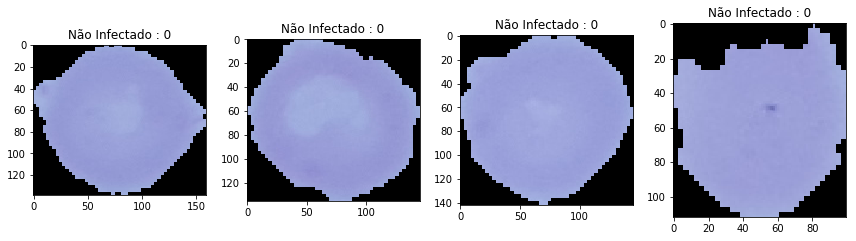

In [6]:
plt.figure(figsize = (12,12))
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = cv2.imread('cell-images-for-detecting-malaria/cell_images/cell_images/Uninfected/' + "/" + uninfected_data[i])
    plt.imshow(img)
    plt.title('Não Infectado : 0')
    plt.tight_layout()
plt.show()

#### Analisando os pixels das imagens

In [11]:
img2=cv2.imread('cell-images-for-detecting-malaria/cell_images/cell_images/Parasitized/' + "/" + parasitized_data[9])
img2[:,:,2]



array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [12]:
path = "cell-images-for-detecting-malaria/cell_images/cell_images/Parasitized"

def getImages(cor):
    arr = []
    for file in os.listdir(path):
        if file != "Thumbs.db":
            img = cv2.imread("{0}/{1}".format(path, file))
            parsedImg = img[:,:,cor]
            arr.append(parsedImg)
    return arr

infectedBlue = getImages(2)
infectedGreen = getImages(0)
infectedRed = getImages(1)

  

In [13]:
path2 = "cell-images-for-detecting-malaria/cell_images/cell_images/Uninfected"

def getImages_un(cor):
    arr = []
    for file in os.listdir(path2):
        if file != "Thumbs.db":
            img = cv2.imread("{0}/{1}".format(path2, file))
            parsedImg = img[:,:,cor]
            arr.append(parsedImg)
    return arr

uninfectedBlue = getImages_un(2)
uninfectedGreen = getImages_un(0)
uninfectedRed = getImages_un(1)


In [14]:
faixas=range(0,220,20)
X_Red=[]
X_Blue=[]
X_Green=[]
for e in range(0,len(infectedRed)):
    X_Red.append(np.histogram(infectedRed[e], bins=faixas, density=True)[0])
    X_Blue.append(np.histogram(infectedBlue[e], bins=faixas, density=True)[0])
    X_Green.append(np.histogram(infectedGreen[e], bins=faixas, density=True)[0])



In [15]:
X2=np.hstack((X_Red,X_Blue,X_Green))


In [16]:
len(X2)

13777

In [17]:
X1_Red=[]
X1_Blue=[]
X1_Green=[]
for e in range(0,len(uninfectedRed)):
    X1_Red.append(np.histogram(uninfectedRed[e], bins=faixas, density=True)[0])
    X1_Blue.append(np.histogram(uninfectedBlue[e], bins=faixas, density=True)[0])
    X1_Green.append(np.histogram(uninfectedGreen[e], bins=faixas, density=True)[0])


In [18]:
X1=np.hstack((X1_Red,X1_Blue,X1_Green))
len(X1)

13779

In [19]:
X=np.vstack((X2,X1))

In [20]:
Y=[]


for i in range(0,13777):
    Y.append(1)

for p in range(0,13779):
    Y.append(0)

In [21]:
from sklearn.model_selection import train_test_split
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=RANDOM_SEED)

In [22]:
len(y_train)

18462

In [23]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [24]:
ypred = model.predict(X_test)

#### Obtendo o score

In [25]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, ypred)

0.961733010776336

## Referências

I) WORLD HEALTH ORGANIZATION. Malaria. Disponível em: https://www.who.int/malaria/en/. Acesso em: 12 nov. 2019.


II) KAGGLE. Malaria Cell Images Dataset. Disponível em: https://www.kaggle.com/iarunava/cell-images-for-detecting-malaria. Acesso em: 12 nov. 2019.


III) KAGGLE. Detecting Malaria (val accuracy > 97%). Disponível em: https://www.kaggle.com/harshel7/detecting-malaria-val-accuracy-97. Acesso em: 12 nov. 2019.

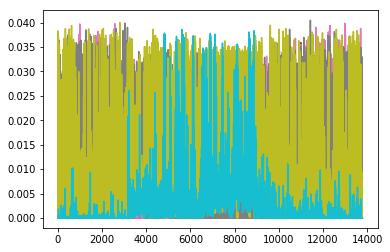

In [36]:
plt.plot(X1_Red);